# data reading

In [391]:
import numpy as np
import pandas as pd
import re
data = pd.read_csv('/content/paa4.csv')
data=data.sample(frac=1)
test_data = data[500:]
data = data[:20000]
print(len(data))
data

1999


,text,paraphrases,category,source
1187,I have a 3d printer. How can I make money off it?,['What are some ways to earn money using my 3d...,question,quora
1385,Why did Arnab Goswami quitted from Times Now?,"[""What was the reason behind Arnab Goswami's d...",question,quora
804,What is the best way to prepare to IELTS?,['What is the most effective method to get rea...,question,quora
302,Do I exist?,"['Is my existence real?', 'Am I a being that e...",question,quora
783,What are some of the best part-time jobs where...,['What are some lucrative part-time jobs that ...,question,quora
...,...,...,...,...
1847,Is the entropy change of a cyclic device alway...,['Does a cyclic device always have zero entrop...,question,quora
227,Does cognition affect perception?,"['Can perception be influenced by cognition?',...",question,quora
491,Is chocolate milk good for you?,['Is chocolate milk beneficial for your health...,question,quora
1160,Which is a suitable inpatient drug and alcohol...,['What are some appropriate drug and alcohol r...,question,quora


In [392]:
# from google.colab import drive
# drive.mount('/content/drive')

# collecting nescessary data

In [393]:
# category={}
# for i in range(len(data)):
#     chatgpt=data.iloc[i]["paraphrases"][1:-1].split(', ')
#     for j in chatgpt[:1]:
#         category[j[1:-1]]='chatgpt'
#     category[data.iloc[i]['text']]="human"
# # category

In [394]:
category = {}
for i in range(len(data)):
    cell_value = data.iloc[i]["paraphrases"]
    if isinstance(cell_value, str):
        chatgpt = cell_value[1:-1].split(', ')
        for j in chatgpt[:1]:
            category[j[1:-1]] = 'chatgpt'
    category[data.iloc[i]['text']] = "human"


# converting dictionary into dataframe

In [395]:
data=pd.DataFrame(category.items(),columns=["text","category"])
data=data.sample(frac=1)
test_data = data[702:]
data=data[701:]
test_data

,text,category
1065,How do I be a boyfriend?,human
1257,What are the existing 10 types of reptiles?,human
3521,Is MITID a reputable institution for studying ...,chatgpt
2130,Have any champions in martial arts begun their...,chatgpt
595,What Game of Thrones villain would be the most...,human
...,...,...
2101,Do you think Hillary Clinton’s pneumonia will ...,human
2233,How do you get surf in Pokemon Emerald?,human
835,What are some good rap songs to dance to?,human
3901,When can I expect my Cognizant confirmation mail?,human


In [396]:
data['category']=data['category'].map({"chatgpt":0,"human":1})
data

,text,category
2452,Is there a scientific explanation for the mira...,0
1065,How do I be a boyfriend?,1
1257,What are the existing 10 types of reptiles?,1
3521,Is MITID a reputable institution for studying ...,0
2130,Have any champions in martial arts begun their...,0
...,...,...
2101,Do you think Hillary Clinton’s pneumonia will ...,1
2233,How do you get surf in Pokemon Emerald?,1
835,What are some good rap songs to dance to?,1
3901,When can I expect my Cognizant confirmation mail?,1


In [397]:
data["category"].value_counts()

1    1647
0    1646
Name: category, dtype: int64

In [398]:
from sklearn.model_selection import train_test_split
X=data['text']
y=data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# vectorizing using tfidf

In [399]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [400]:
X_train=X_train_tfidf.toarray()
X_test=X_test_tfidf.toarray()

In [401]:
print(X_train_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# BERT

# importing state-of-the-art classifiers

In [402]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [403]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0, probability=True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [404]:
from sklearn import metrics

In [405]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    pre_score = metrics.precision_score(y_test,pr,average="binary", pos_label="chatgpt")
    recall= metrics.recall_score(y_test,pr,average="binary", pos_label="chatgpt")
    f1= metrics.f1_score(y_test,pr,average="binary", pos_label="chatgpt")
    mcc= metrics.matthews_corrcoef(y_test,pr)
    return acc_score,pre_score,recall,f1,mcc

In [406]:
acc_score = {}
pre_score = {}
recall_score={}
f1_score={}
mcc_score={}
clfs= {
    'LR':lg,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    # 'ABC':abc,
    # 'BG':bg,
    # 'GBC':gbc,
#     'XGB':xgb
}


In [407]:
# for name,clf in clfs.items():
#     acc_score[name],pre_score[name],recall_score[name],f1_score[name],mcc_score[name] = score_prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)

In [408]:
acc_score

{}

In [409]:
pre_score

{}

In [410]:
recall_score

{}

In [411]:
f1_score

{}

In [412]:
mcc_score

{}

# the best performance is provided by extra-tree-classifier

In [413]:
etc.fit(X_train_tfidf,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [414]:
from sklearn.metrics import confusion_matrix
y_pred =etc.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[251  90]
 [ 87 231]]


In [415]:
y_test.value_counts()

0    341
1    318
Name: category, dtype: int64

# confusion matrix

<Axes: xlabel='Predicted', ylabel='Actual'>

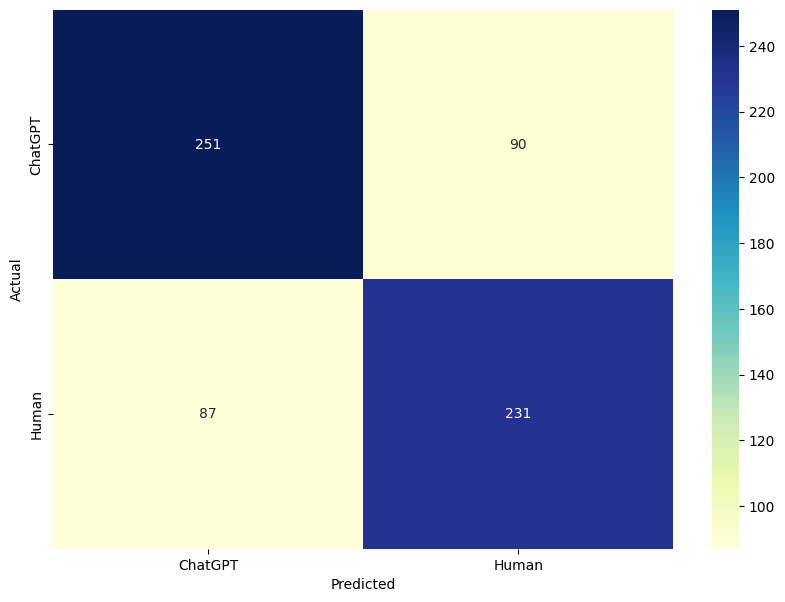

In [416]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
df_cm.index.name="Actual"
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

# roc curve

In [417]:
from sklearn.metrics import roc_curve,auc
y_prob = etc.predict_proba(X_test_tfidf)[:, 1]

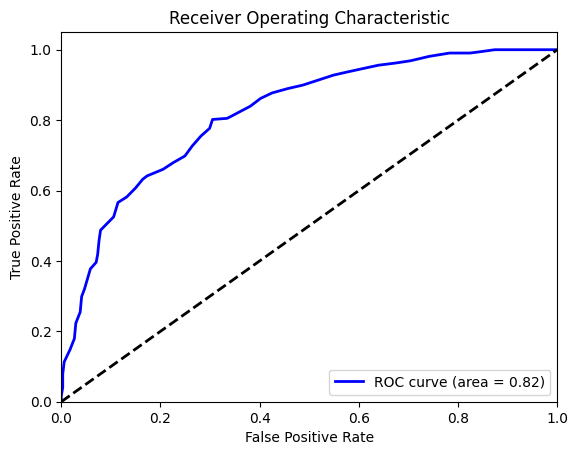

In [418]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [419]:
probas = {}
for name, model in clfs.items():
    print(name)
    model.fit(X_train, y_train)
    probas[name] = model.predict_proba(X_test)[:, 1]

LR
DTC
KNN
RFC
ETC


In [420]:
probas

{'LR': array([0.52191119, 0.92407406, 0.80569261, 0.90020949, 0.38395144,
        0.84458602, 0.56671865, 0.91786625, 0.5409068 , 0.19933525,
        0.27855867, 0.39279668, 0.469843  , 0.2313693 , 0.27849774,
        0.40894098, 0.40128443, 0.70676429, 0.48601555, 0.60586741,
        0.3200548 , 0.82474134, 0.5604552 , 0.61565773, 0.2757146 ,
        0.67499758, 0.6257101 , 0.48920592, 0.63811836, 0.50286158,
        0.5       , 0.52468346, 0.5956091 , 0.63525599, 0.41124361,
        0.91380233, 0.27609864, 0.98466393, 0.24982412, 0.37231554,
        0.08369976, 0.12906143, 0.81633255, 0.2045252 , 0.83242608,
        0.08717954, 0.09148919, 0.81357273, 0.11793755, 0.56638941,
        0.33036753, 0.07149361, 0.24150205, 0.36719516, 0.45493065,
        0.5       , 0.3849148 , 0.8444891 , 0.33619065, 0.32939863,
        0.37811115, 0.08521326, 0.88775684, 0.71185402, 0.52862654,
        0.5       , 0.87618742, 0.56592586, 0.35236318, 0.04975591,
        0.70764675, 0.35496722, 0.4666705 

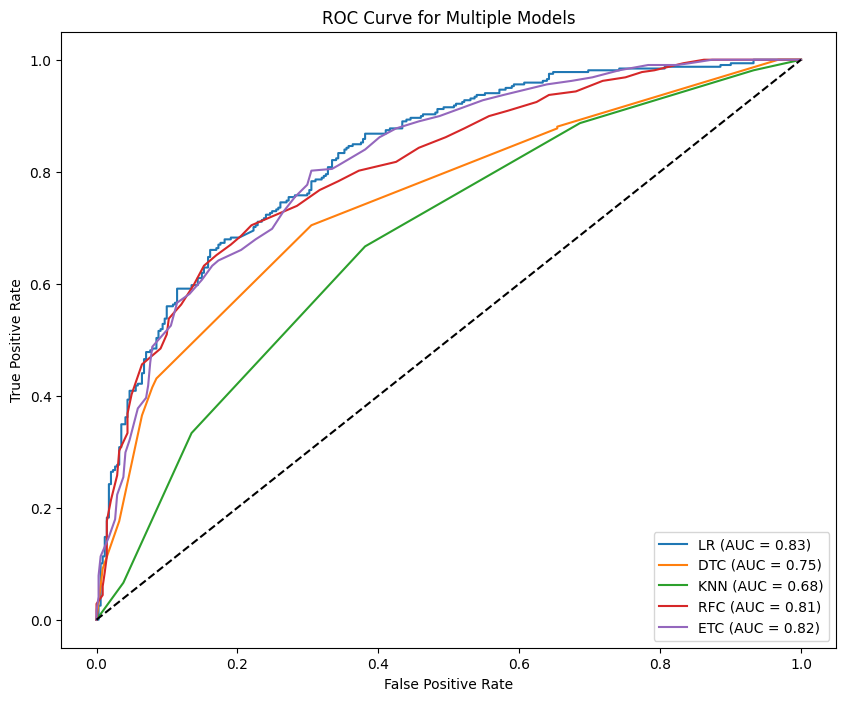

In [421]:
plt.figure(figsize=(10, 8))
for name, proba in probas.items():
    fpr, tpr, thresholds = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Add some labels and legends
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc='lower right')
plt.show()

In [422]:
plt.savefig("output.png")

<Figure size 640x480 with 0 Axes>

In [423]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [424]:
print(X_train.shape)

(2634, 5039)


In [425]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn import metrics
_,input_shape=X_train.shape
model = Sequential()
model.add(Dense(64,input_shape = (input_shape,), activation = 'relu'))
model.add(keras.layers.RepeatVector(32))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 64)                322560    
                                                                 
 repeat_vector_7 (RepeatVec  (None, 32, 64)            0         
 tor)                                                            
                                                                 
 dense_50 (Dense)            (None, 32, 32)            2080      
                                                                 
 dense_51 (Dense)            (None, 32, 16)            528       
                                                                 
 dense_52 (Dense)            (None, 32, 32)            544       
                                                                 
 dense_53 (Dense)            (None, 32, 64)            2112      
                                                      

In [426]:
model.compile(loss='binary_crossentropy',metrics=['accuracy',])
model.fit(X_train, y_train, epochs=15, batch_size=128,verbose=2)

Epoch 1/15
21/21 - 2s - loss: 0.6933 - accuracy: 0.4973 - 2s/epoch - 78ms/step
Epoch 2/15
21/21 - 0s - loss: 0.6883 - accuracy: 0.5873 - 346ms/epoch - 16ms/step
Epoch 3/15
21/21 - 0s - loss: 0.6317 - accuracy: 0.7661 - 335ms/epoch - 16ms/step
Epoch 4/15
21/21 - 0s - loss: 0.4484 - accuracy: 0.8626 - 338ms/epoch - 16ms/step
Epoch 5/15
21/21 - 0s - loss: 0.2530 - accuracy: 0.9241 - 362ms/epoch - 17ms/step
Epoch 6/15
21/21 - 0s - loss: 0.1418 - accuracy: 0.9556 - 341ms/epoch - 16ms/step
Epoch 7/15
21/21 - 0s - loss: 0.0825 - accuracy: 0.9780 - 341ms/epoch - 16ms/step
Epoch 8/15
21/21 - 0s - loss: 0.0479 - accuracy: 0.9867 - 341ms/epoch - 16ms/step
Epoch 9/15
21/21 - 0s - loss: 0.0278 - accuracy: 0.9932 - 339ms/epoch - 16ms/step
Epoch 10/15
21/21 - 0s - loss: 0.0174 - accuracy: 0.9954 - 343ms/epoch - 16ms/step
Epoch 11/15
21/21 - 0s - loss: 0.0139 - accuracy: 0.9962 - 337ms/epoch - 16ms/step
Epoch 12/15
21/21 - 0s - loss: 0.0082 - accuracy: 0.9973 - 338ms/epoch - 16ms/step
Epoch 13/15
21/2

In [427]:
yPred=model.predict(X_test)

21/21 [==============================] - 0s 4ms/step


In [428]:
print(yPred)

[[[8.0386102e-01]
  [8.0386102e-01]
  [8.0386102e-01]
  ...
  [8.0386102e-01]
  [8.0386102e-01]
  [8.0386102e-01]]

 [[9.9676603e-01]
  [9.9676603e-01]
  [9.9676603e-01]
  ...
  [9.9676603e-01]
  [9.9676603e-01]
  [9.9676603e-01]]

 [[9.9985904e-01]
  [9.9985904e-01]
  [9.9985904e-01]
  ...
  [9.9985904e-01]
  [9.9985904e-01]
  [9.9985904e-01]]

 ...

 [[9.8811406e-01]
  [9.8811406e-01]
  [9.8811406e-01]
  ...
  [9.8811406e-01]
  [9.8811406e-01]
  [9.8811406e-01]]

 [[1.3321191e-04]
  [1.3321191e-04]
  [1.3321191e-04]
  ...
  [1.3321191e-04]
  [1.3321191e-04]
  [1.3321191e-04]]

 [[4.2053100e-02]
  [4.2053100e-02]
  [4.2053100e-02]
  ...
  [4.2053100e-02]
  [4.2053100e-02]
  [4.2053100e-02]]]


In [429]:
# print(model.predict)
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [430]:
x=[]
for i in yPred:
    x.append(i[0])

In [431]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer()
var1_tfidf = vectorizer1.fit_transform(['To resolve this issue, you need to reshape your input data appropriately to match the expected input shape of your model. If your input data has shape'])
# X_test_tfidf = vectorizer1.transform(X_test)
var1=var1_tfidf.toarray()
print(var1)
# X_test=X_test_tfidf.toarray()

[[0.14285714 0.28571429 0.14285714 0.14285714 0.14285714 0.42857143
  0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
  0.14285714 0.28571429 0.14285714 0.14285714 0.42857143 0.14285714
  0.42857143]]


In [432]:
probas["LSTM"]=np.squeeze(x)

In [433]:
var1.shape

(1, 19)

In [434]:
import pickle

In [435]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Sample input text
i= [
      'This is a human'

    # 'To resolve this issue, you need to reshape your input data appropriately to match the expected input shape of your model. If your input data has shape',
              # 'To use Random Forest in scikit-learn for your text classification model, you can follow a similar approach as you did with Logistic Regression.'
   ]
input_text = data['text']
# y_train = data['category']
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Vectorize the input text
X_train_tfidf = vectorizer.fit_transform(input_text)
X_train = X_train_tfidf.toarray()

# Ensure y_train contains multiple samples to match X_train
# y_train = np.array([0, 1, 1])  # Assuming only one class for demonstration

y_train = data['category']


# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Transform the input text to a feature vector
input_vector = vectorizer.transform(i).toarray()

# Predict using the trained classifier
prediction = rf_classifier.predict(input_vector)

print("Prediction:", prediction)
# input_text = data['text']
# result = data['category']
# data

Prediction: [1]


In [436]:
from sklearn.metrics import accuracy_score

# Sample input text for testing
test_input_text = test_data['text']

# Vectorize the input text using the same vectorizer
X_test_tfidf = vectorizer.transform(test_input_text)
X_test = X_test_tfidf.toarray()

# True labels for the test data
y_true = test_data['category']
y_true_numeric = [0 if label == 'chatgpt' else 1 for label in y_true]

# Predict using the trained classifier
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_true_numeric, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0
